In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wce
#from IPython.display import display, Latex


Functions used in Plotting

In [2]:
def plot_wilson_coefficients(list_of_energy_solutions, list_of_wc, labels=None, title=None, save_path=None):
    colors = ["blue", "green", "red", "orange", "black", "gray"]
    line_styles = ["solid", "solid", "solid", "solid"]
    fig, axs = plt.subplots(3, 3, figsize=(12, 10))
    axs = axs.flatten()

    # Iterate over all datasets
    for idx, (energy_solutions, wilson_coefficients) in enumerate(zip(list_of_energy_solutions, list_of_wc)):

        for i in range(9):
            flag = True
            for e, wc in zip(energy_solutions, wilson_coefficients):
                if flag:
                    label = labels[idx] if labels else None
                    flag = False
                else:
                    label = None
                axs[i].plot(e, wc[i], label=label, color=colors[idx], linestyle=line_styles[idx % len(line_styles)])

    for i in range(9):
        axs[i].set_xlabel("E (TeV)")
        axs[i].set_ylabel(f"$C^{(i+1)}$")
        axs[i].grid(True)
        #axs[i].set_yscale('log')
        if labels:
            axs[i].legend()

    if title:
        plt.suptitle(title)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [3]:
def plot_Lambda_bar_graph(Lambda, title=None, save_path=None):
    categories = [f"$C^{{({i+1})}}$" for i in range(9)]

    # Bar values (replace with your real data)
    with_rge = [Lambda[-1][i][-1]*1e-12 for i in range(9)]
    without_rge = [Lambda[0][i][0]*1e-12 for i in range(9)]

    print(title)
    for i in range(9):
        #display(Latex(f"{categories[i]}: with RGE = {with_rge[i]:.2f} TeV, without RGE = {without_rge[i]:.2f} TeV"))
        print(f"C{i+1}: with RGE = {with_rge[i]} TeV, without RGE = {without_rge[i]} TeV")
    # X locations
    x = np.arange(len(categories))  # [0, 1, 2, ..., 8]
    width = 0.35  # Width of the bars

    # Plot side-by-side bars
    plt.bar(x - width/2, with_rge, width, label="with RGE")
    plt.bar(x + width/2, without_rge, width, label="without RGE", alpha=0.5, color="blue")

    # Log scale on y-axis
    #plt.yscale('log')

    # Labels and formatting
    plt.xticks(x, categories)
    plt.ylabel(f"$\Lambda$ (TeV)")
    if title:
        plt.title(title)
    plt.legend(loc="lower right")
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)

    plt.show()


Evolution of Wilson Coefficients for different cases

In [4]:
E_END = 1000e12
initial_wc = [0.1]*9

<center><strong>Case 1 (SM)</strong></center>

In [5]:
E_transitions = [91.19e9]

NJKL_val = [
    [0, 0, 0, 0],
]

X_val = [0]

initial_couplings = [
    [
        [12.38e-6],
        [26.9e-6],
        
        [0.357],
        [0.651],
        [1.215],
    ]
]



In [6]:
t_solutions_1, y_solutions_1 = wce.evolve(E_transitions, NJKL_val, X_val, initial_couplings, initial_wc, E_END)[:2]

energy_solutions_1 = np.exp(t_solutions_1) * 1e-12  # Energy in TeV
wilson_coefficients_1 = [y_sol['wc'] for y_sol in y_solutions_1]

In [7]:
g1_1 = [y_sol['g1'] for y_sol in y_solutions_1]
g2_1 = [y_sol['g2'] for y_sol in y_solutions_1]
g3_1 = [y_sol['g3'] for y_sol in y_solutions_1]


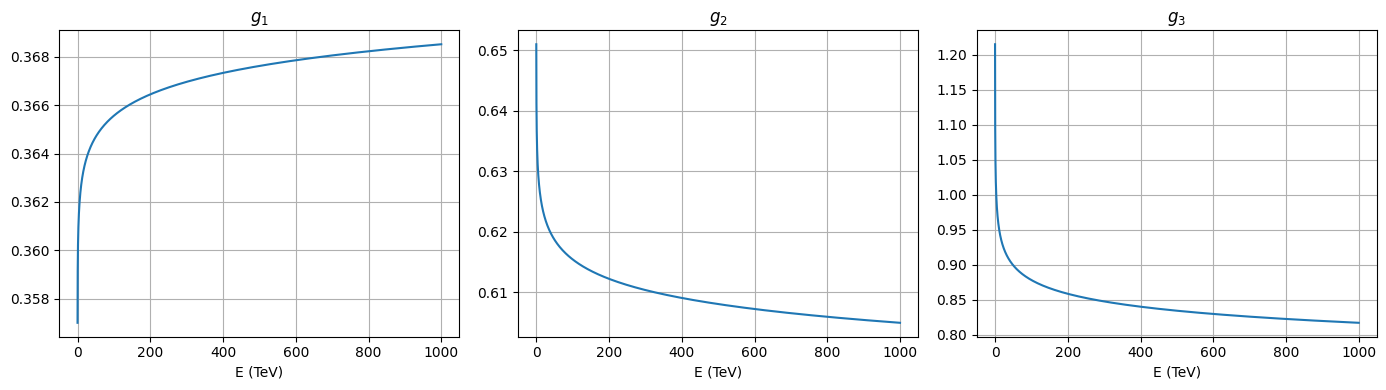

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
axs[0].plot(energy_solutions_1[0], g1_1[0][0])
axs[0].set_title("$g_1$")
axs[0].set_xlabel("E (TeV)")
axs[0].grid(True)

axs[1].plot(energy_solutions_1[0], g2_1[0][0])
axs[1].set_title("$g_2$")
axs[1].set_xlabel("E (TeV)")
axs[1].grid(True)

axs[2].plot(energy_solutions_1[0], g3_1[0][0])
axs[2].set_title("$g_3$")
axs[2].set_xlabel("E (TeV)")
axs[2].grid(True)

plt.tight_layout()
plt.show()

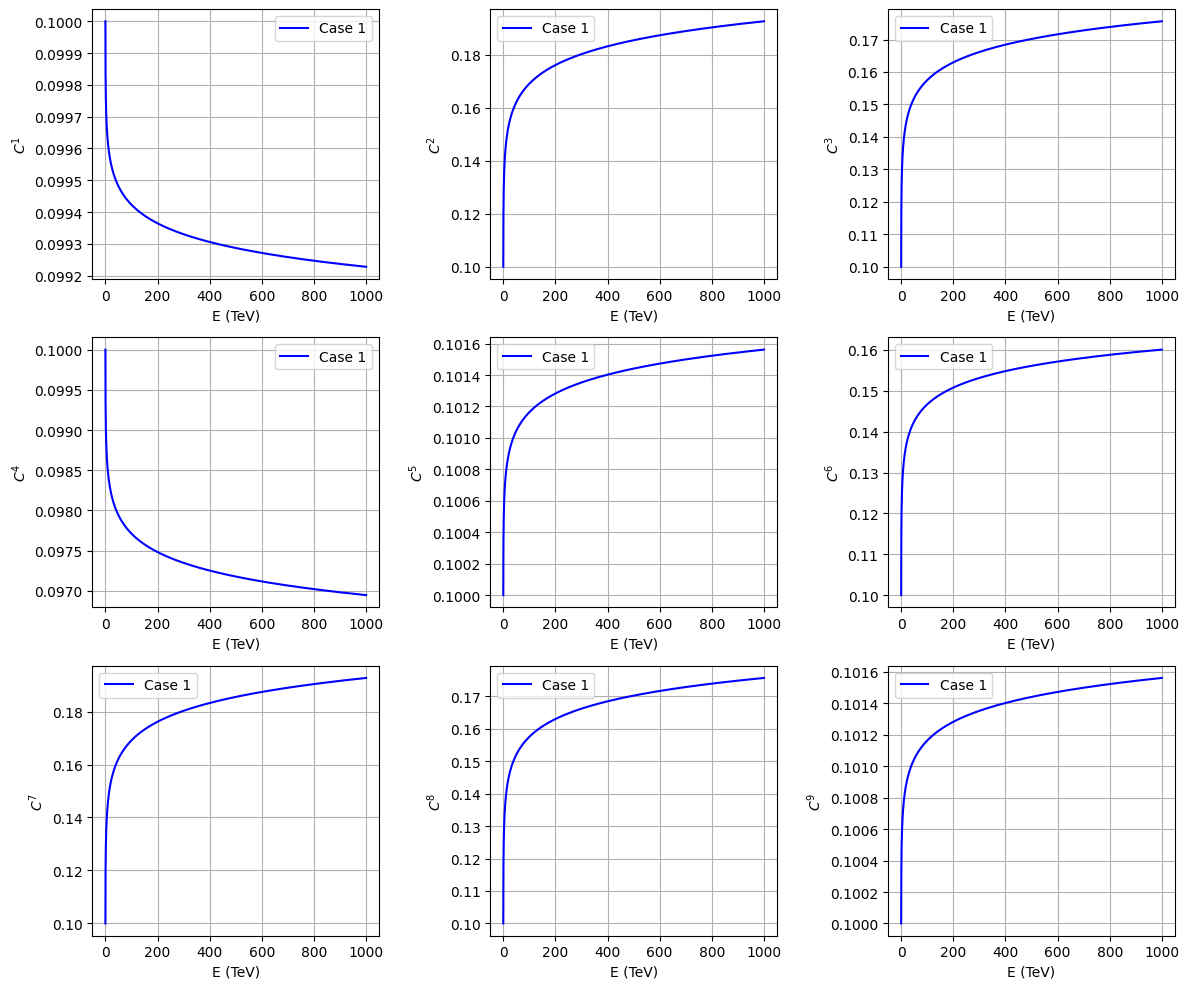

In [9]:
plot_wilson_coefficients([energy_solutions_1],
                         [ wilson_coefficients_1],
                         labels=["Case 1"])

<center><strong>Case 2
</strong></center>

In [10]:
E_transitions = [91.19e9]

NJKL_val = [
    [0, 0, 0, 0],
]

X_val = [0, 0]

n = int((E_END - 10e12) // 10e12)
print(n)
for i in range(n):
    E_transitions.append(10e12 + i * 10e12)
    N = 0
    J = i+1
    K = 0
    L = 0
    NJKL_val.append([N, J, K, L])
    X_val.append(i+1)




99


In [11]:
initial_couplings = [
    [
        [12.38e-6],
        [26.9e-6],
        
        [0.357],
        [0.651],
        [1.215],
    ],
]

for i in range(n):
    g1_coupling = [None]*(i+1)
    g1_coupling.append(0.5)
    initial_couplings.append(
        [
            [None],
            [None],

            g1_coupling,
            [None],
            [None],
        ]
    )

print(initial_couplings[:5])

[[[1.238e-05], [2.69e-05], [0.357], [0.651], [1.215]], [[None], [None], [None, 0.5], [None], [None]], [[None], [None], [None, None, 0.5], [None], [None]], [[None], [None], [None, None, None, 0.5], [None], [None]], [[None], [None], [None, None, None, None, 0.5], [None], [None]]]


In [12]:
t_solutions_2, y_solutions_2 = wce.evolve(E_transitions, NJKL_val, X_val, initial_couplings, initial_wc, E_END)[:2]

energy_solutions_2 = np.exp(t_solutions_2) * 1e-12  # Energy in TeV
wilson_coefficients_2 = [y_sol['wc'] for y_sol in y_solutions_2]

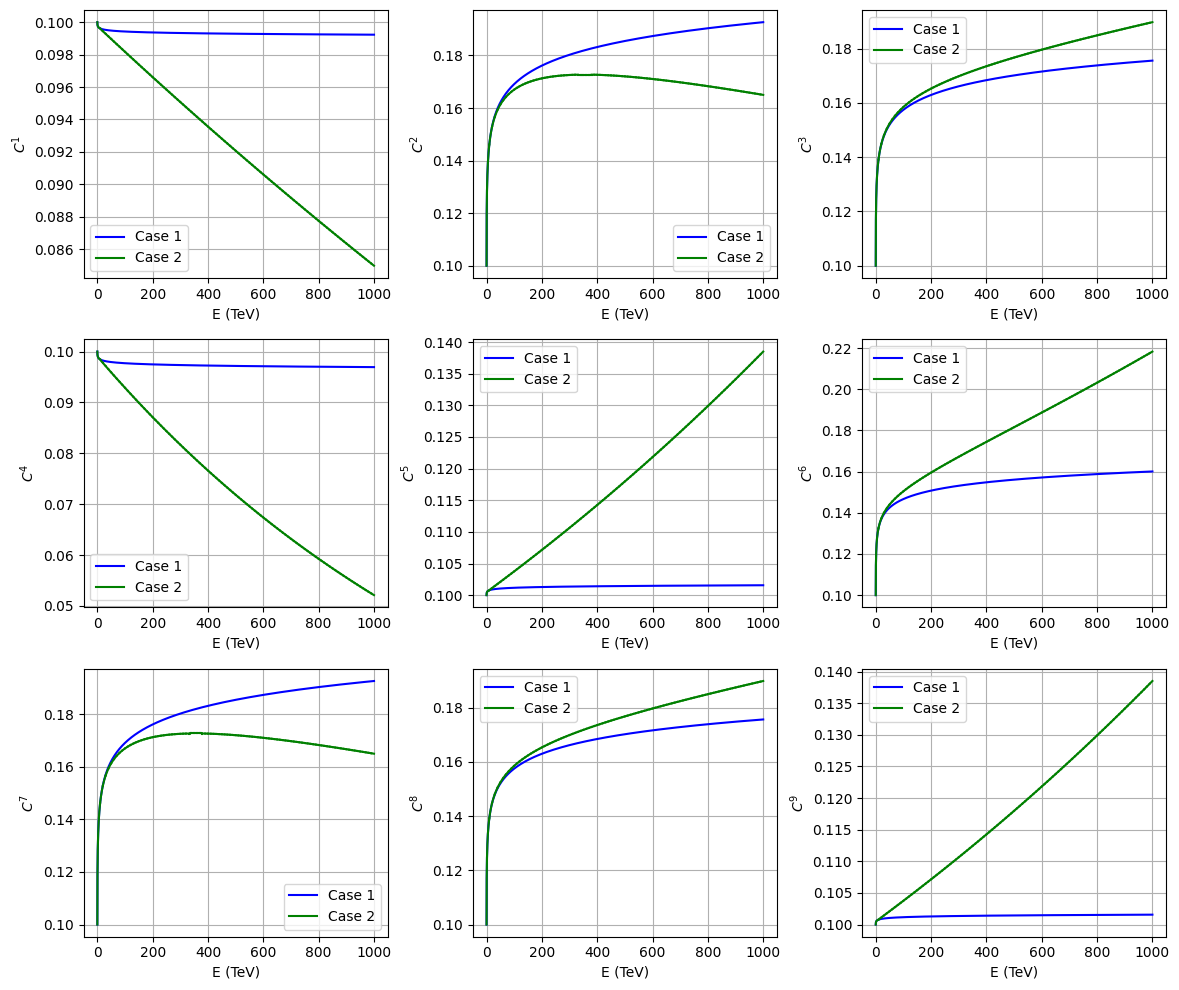

In [13]:
plot_wilson_coefficients([energy_solutions_1, energy_solutions_2],
                         [wilson_coefficients_1, wilson_coefficients_2],
                         labels=["Case 1", "Case 2"],)

<center><strong>Case 3</strong></center>

In [14]:
E_transitions = [91.19e9]

NJKL_val = [
    [0, 0, 0, 0],
]

X_val = [0, 0]

n = int((E_END - 10e12) // 10e12)
print(n)
for i in range(n):
    E_transitions.append(10e12 + i * 10e12)
    N = i+1
    J = 0
    K = 0
    L = 0
    NJKL_val.append([N, J, K, L])
    X_val.append(i+1)




99


In [15]:
initial_couplings = [
    [
        [12.38e-6],
        [26.9e-6],
        
        [0.357],
        [0.651],
        [1.215],
    ],
]

for i in range(n):
    N_coupling = [None]*(i+1)
    N_coupling.append(0.1)
    initial_couplings.append(
        [
            N_coupling,
            N_coupling,

            [None],
            [None],
            [None],
        ]
    )

print(initial_couplings[:5])

[[[1.238e-05], [2.69e-05], [0.357], [0.651], [1.215]], [[None, 0.1], [None, 0.1], [None], [None], [None]], [[None, None, 0.1], [None, None, 0.1], [None], [None], [None]], [[None, None, None, 0.1], [None, None, None, 0.1], [None], [None], [None]], [[None, None, None, None, 0.1], [None, None, None, None, 0.1], [None], [None], [None]]]


In [16]:
t_solutions_3, y_solutions_3 = wce.evolve(E_transitions, NJKL_val, X_val, initial_couplings, initial_wc, E_END)[:2]

energy_solutions_3 = [np.exp(arr) * 1e-12 for arr in t_solutions_3]  # Energy in TeV
wilson_coefficients_3 = [y_sol['wc'] for y_sol in y_solutions_3]

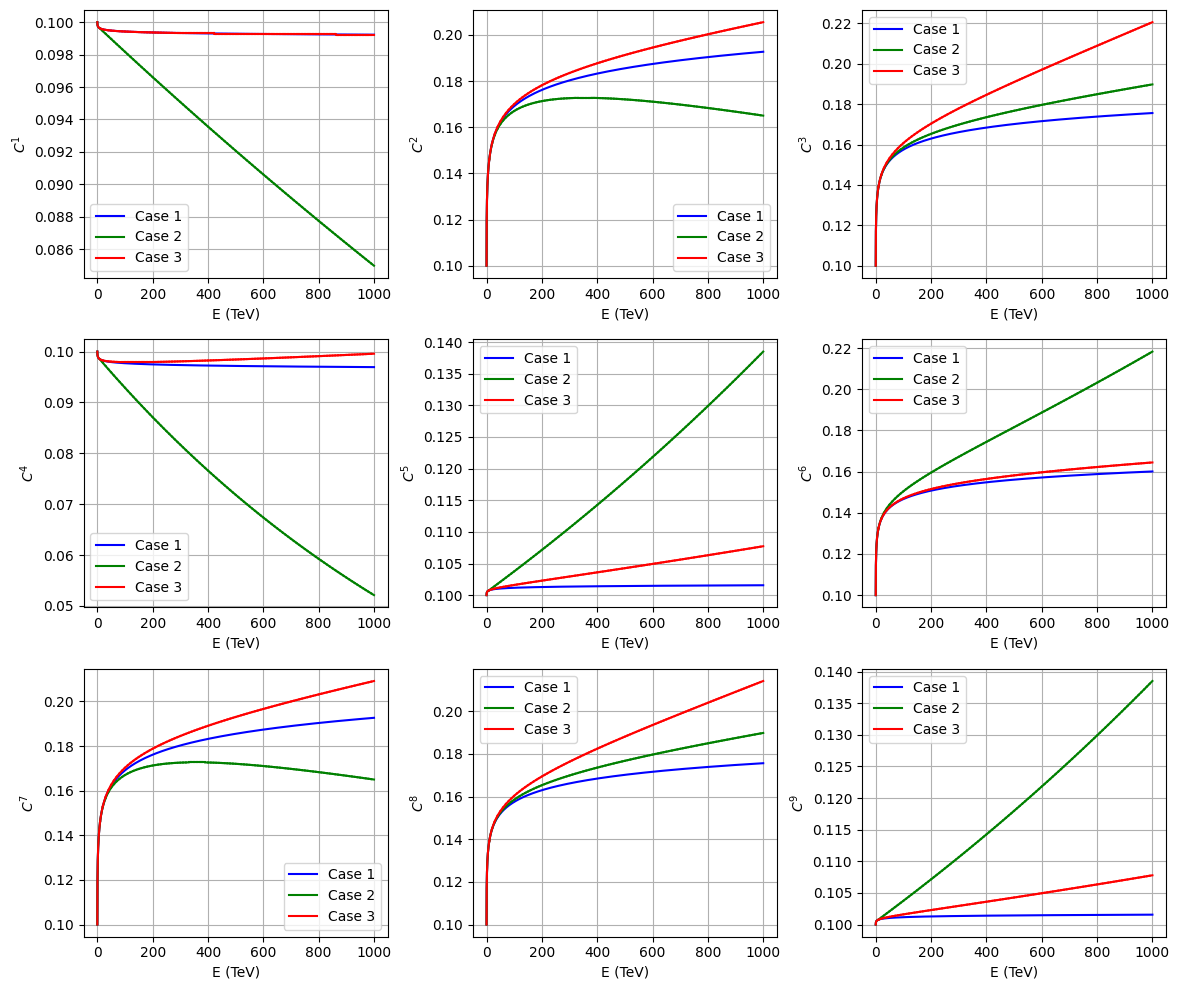

In [17]:
plot_wilson_coefficients([energy_solutions_1, energy_solutions_2, energy_solutions_3],
                         [wilson_coefficients_1, wilson_coefficients_2, wilson_coefficients_3],
                         labels=["Case 1", "Case 2", "Case 3"],)

<center><strong>Case 4</strong></center>

In [18]:
E_transitions = [91.19e9]

NJKL_val = [
    [0, 0, 0, 0],
]

X_val = [0, 0]

n = int((E_END - 10e12) // 10e12)
print(n)
for i in range(n):
    E_transitions.append(10e12 + i * 10e12)
    N = i+1
    J = i+1
    K = 0
    L = 0
    NJKL_val.append([N, J, K, L])
    X_val.append(i+1)




99


In [19]:
initial_couplings = [
    [
        [12.38e-6],
        [26.9e-6],
        
        [0.357],
        [0.651],
        [1.215],
    ],
]

for i in range(n):
    N_coupling = [None]*(i+1)
    N_coupling.append(0.1)
    g1_coupling = [None]*(i+1)
    g1_coupling.append(0.5)
    initial_couplings.append(
        [
            N_coupling,
            N_coupling,

            g1_coupling,
            [None],
            [None],
        ]
    )

print(initial_couplings[:5])

[[[1.238e-05], [2.69e-05], [0.357], [0.651], [1.215]], [[None, 0.1], [None, 0.1], [None, 0.5], [None], [None]], [[None, None, 0.1], [None, None, 0.1], [None, None, 0.5], [None], [None]], [[None, None, None, 0.1], [None, None, None, 0.1], [None, None, None, 0.5], [None], [None]], [[None, None, None, None, 0.1], [None, None, None, None, 0.1], [None, None, None, None, 0.5], [None], [None]]]


In [20]:
t_solutions_4, y_solutions_4 = wce.evolve(E_transitions, NJKL_val, X_val, initial_couplings, initial_wc, E_END)[:2]

energy_solutions_4 = [np.exp(arr) * 1e-12 for arr in t_solutions_4]  # Energy in TeV
wilson_coefficients_4 = [y_sol['wc'] for y_sol in y_solutions_4]

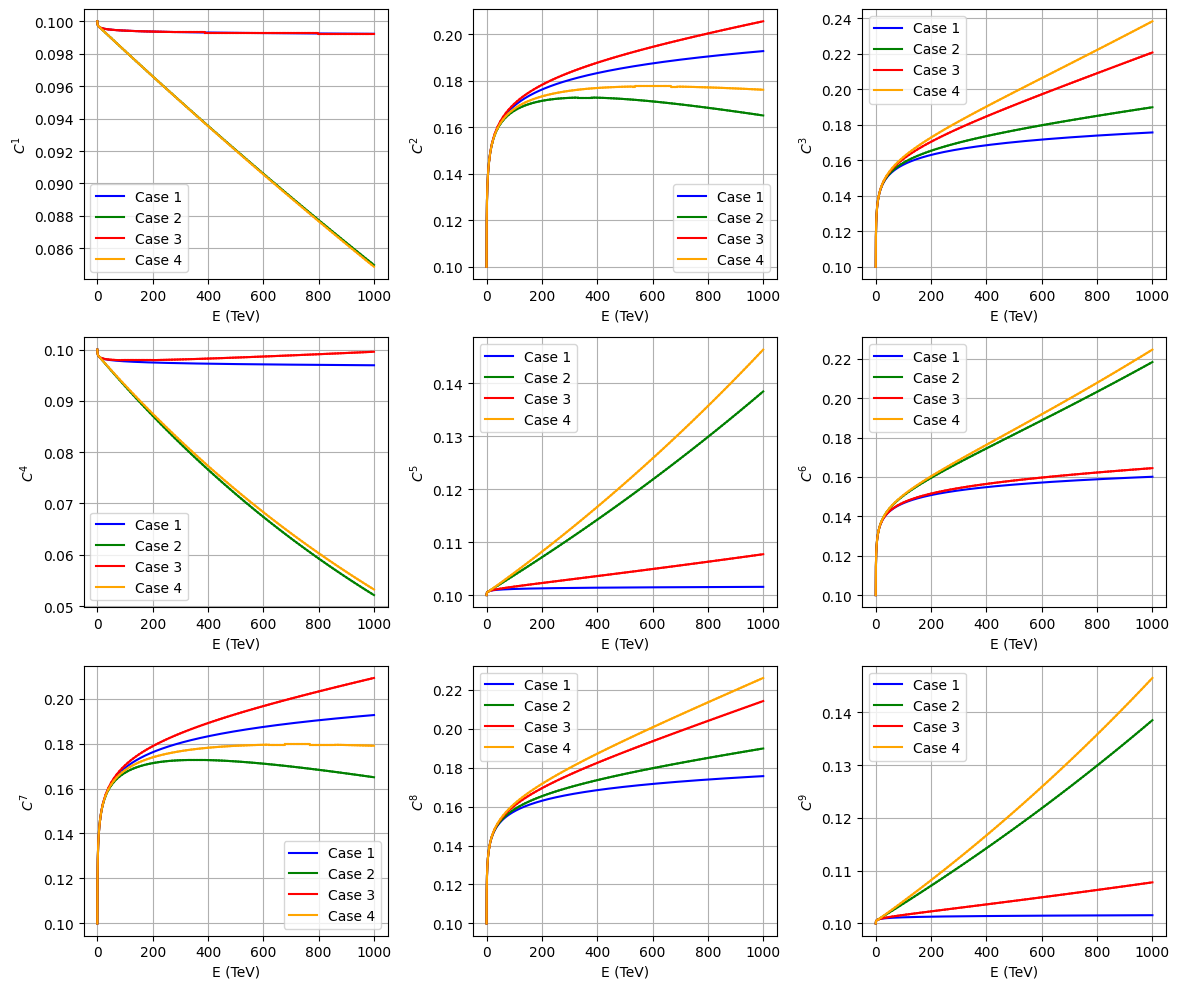

In [21]:
plot_wilson_coefficients([energy_solutions_1, energy_solutions_2, energy_solutions_3, energy_solutions_4],
                         [wilson_coefficients_1, wilson_coefficients_2, wilson_coefficients_3, wilson_coefficients_4],
                         labels=["Case 1", "Case 2", "Case 3", "Case 4"],
                         save_path="results/wilson_coefficients.pdf",)

Finding $\Lambda^{(n)}$ using Wilson Coefficient

In [22]:
alpha = -0.01257 * 1e27 # eV^3
beta = 0.01269 * 1e27 # eV^3

A = [alpha**2, -alpha*beta, alpha*beta, beta**2, -beta**2, -beta**2, alpha**2, alpha**2, beta**2]

delta_m = 1e-34*1e9 # eV

def Lambda(wilson_coefficients):
    output = []
    for i, wc in enumerate(wilson_coefficients):
        output.append(np.array([np.abs(wc[j]*A[j]/delta_m)**(1/5) for j in range(len(wc))]))

    return output

In [23]:
Lambda1 = Lambda(wilson_coefficients_1)
Lambda2 = Lambda(wilson_coefficients_2)
Lambda3 = Lambda(wilson_coefficients_3)
Lambda4 = Lambda(wilson_coefficients_4)

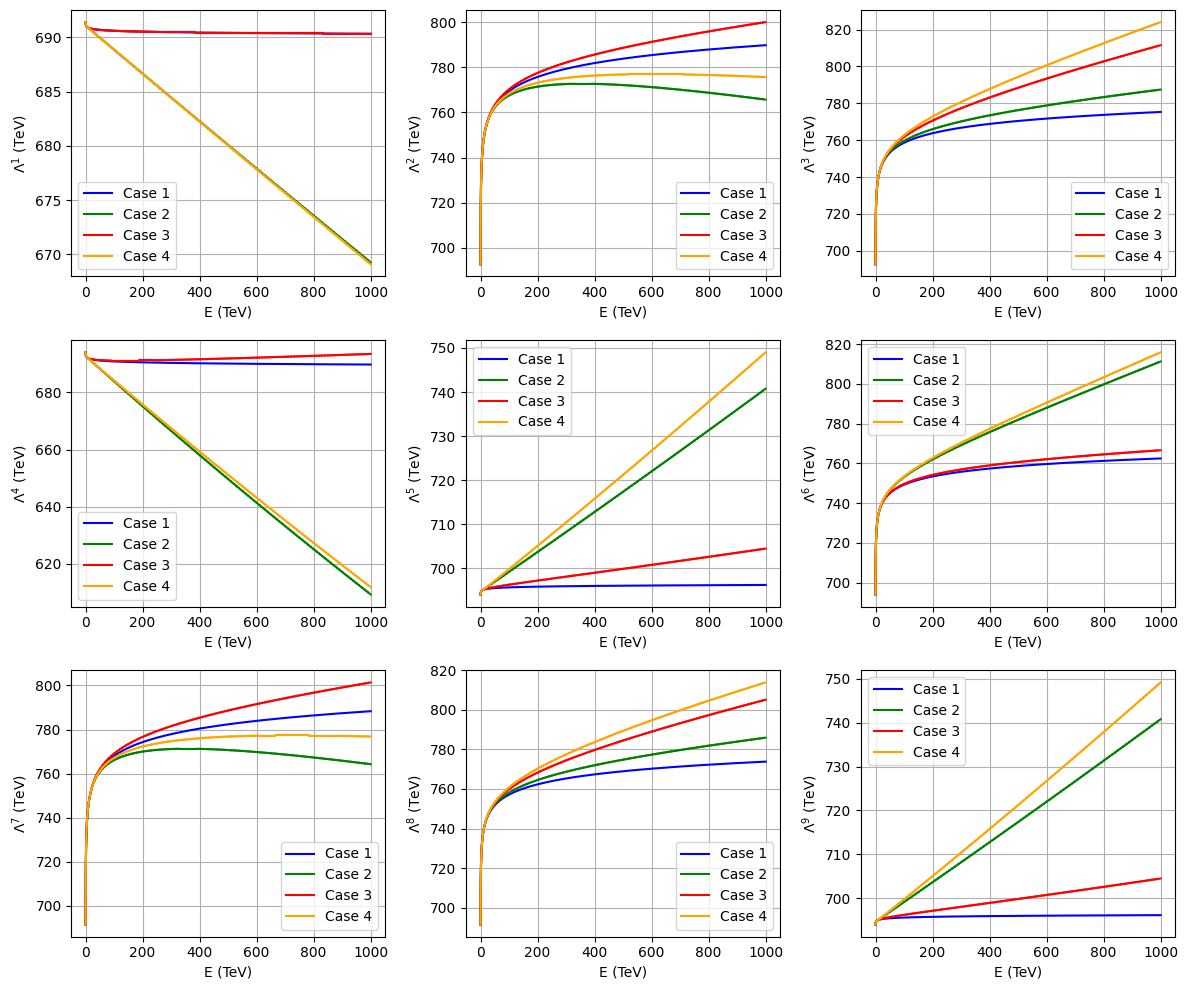

In [24]:
# PLOTTING THE EVOLUTION OF LAMBDA
fig, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.flatten()

energy_solutions_list = [energy_solutions_1, energy_solutions_2, energy_solutions_3, energy_solutions_4]
Lambda_list = [Lambda1, Lambda2, Lambda3, Lambda4]

labels = ["Case 1", "Case 2", "Case 3", "Case 4"]
colors = ["blue", "green", "red", "orange", "black", "gray"]
line_styles = ["solid", "solid", "solid", "solid"]

# Plot each Lambda

for j in range(len(Lambda_list)):
    energy_solutions = energy_solutions_list[j]
    Lambda = Lambda_list[j]
    for i in range(9):
        flag = True
        for e, l in zip(energy_solutions, Lambda): # In TeV
            axs[i].plot(e, l[i]*1e-12, label=labels[j] if flag else None, color=colors[j], linestyle=line_styles[j % len(line_styles)])
            flag = False
        axs[i].set_xlabel("E (TeV)")
        axs[i].set_ylabel(f"$\Lambda^{(i+1)}$ (TeV)")
        axs[i].grid(True)
        #axs[i].set_yscale('log')
        axs[i].legend()

plt.tight_layout()
plt.savefig("results/Lambda.pdf")
plt.show()

Case 1
C1: with RGE = 690.3368295464612 TeV, without RGE = 691.4075395776874 TeV
C2: with RGE = 789.8133947413081 TeV, without RGE = 692.7226371290008 TeV
C3: with RGE = 775.3071155066087 TeV, without RGE = 692.7226371290008 TeV
C4: with RGE = 689.7510641922919 TeV, without RGE = 694.0402360727206 TeV
C5: with RGE = 696.1948136736944 TeV, without RGE = 694.0402360727206 TeV
C6: with RGE = 762.5175042958025 TeV, without RGE = 694.0402360727206 TeV
C7: with RGE = 788.3139754943005 TeV, without RGE = 691.4075395776874 TeV
C8: with RGE = 773.8352356520054 TeV, without RGE = 691.4075395776874 TeV
C9: with RGE = 696.1948136736944 TeV, without RGE = 694.0402360727206 TeV


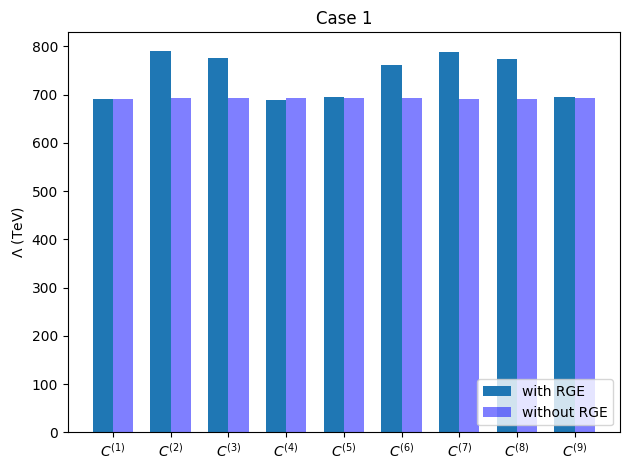

Case 2
C1: with RGE = 669.2521592207453 TeV, without RGE = 691.4075395776874 TeV
C2: with RGE = 765.7043779495348 TeV, without RGE = 692.7226371290008 TeV
C3: with RGE = 787.4411127821588 TeV, without RGE = 692.7226371290008 TeV
C4: with RGE = 609.2665409850987 TeV, without RGE = 694.0402360727206 TeV
C5: with RGE = 740.7528122306187 TeV, without RGE = 694.0402360727206 TeV
C6: with RGE = 811.3351927770383 TeV, without RGE = 694.0402360727206 TeV
C7: with RGE = 764.2507284045597 TeV, without RGE = 691.4075395776874 TeV
C8: with RGE = 785.9461971694276 TeV, without RGE = 691.4075395776874 TeV
C9: with RGE = 740.7528122306187 TeV, without RGE = 694.0402360727206 TeV


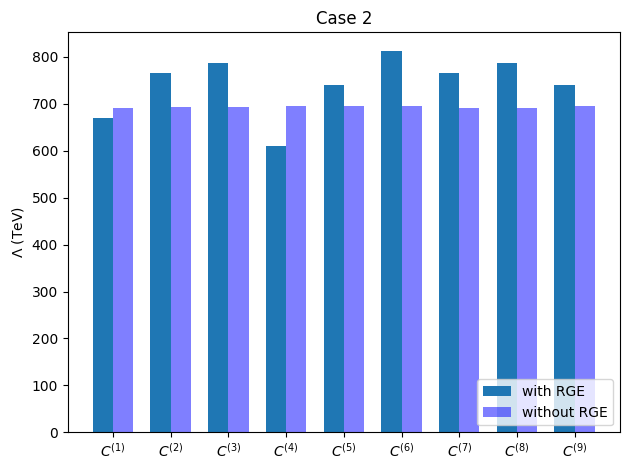

Case 3
C1: with RGE = 690.3350082612247 TeV, without RGE = 691.4075395776874 TeV
C2: with RGE = 800.0481627407877 TeV, without RGE = 692.7226371290008 TeV
C3: with RGE = 811.5026112843715 TeV, without RGE = 692.7226371290008 TeV
C4: with RGE = 693.4593842171365 TeV, without RGE = 694.0402360727206 TeV
C5: with RGE = 704.4527159993838 TeV, without RGE = 694.0402360727206 TeV
C6: with RGE = 766.6432466467295 TeV, without RGE = 694.0402360727206 TeV
C7: with RGE = 801.3762385521902 TeV, without RGE = 691.4075395776874 TeV
C8: with RGE = 805.1517533665657 TeV, without RGE = 691.4075395776874 TeV
C9: with RGE = 704.5253575712842 TeV, without RGE = 694.0402360727206 TeV


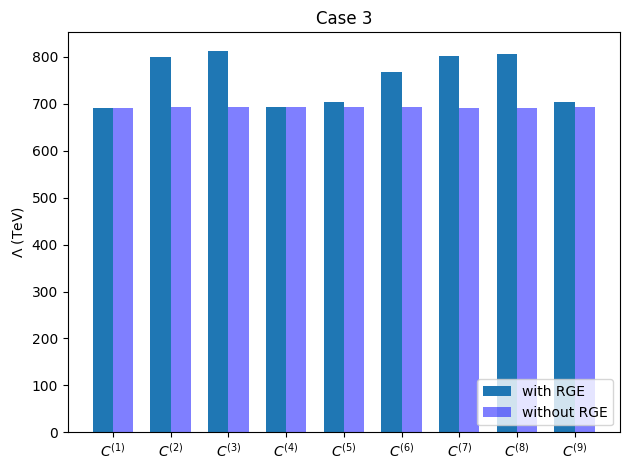

Case 4
C1: with RGE = 669.0802972176036 TeV, without RGE = 691.4075395776874 TeV
C2: with RGE = 775.7031859718379 TeV, without RGE = 692.7226371290008 TeV
C3: with RGE = 824.0362562804679 TeV, without RGE = 692.7226371290008 TeV
C4: with RGE = 611.8049699015714 TeV, without RGE = 694.0402360727206 TeV
C5: with RGE = 749.0239180179391 TeV, without RGE = 694.0402360727206 TeV
C6: with RGE = 815.9719425912482 TeV, without RGE = 694.0402360727206 TeV
C7: with RGE = 776.8081325917625 TeV, without RGE = 691.4075395776874 TeV
C8: with RGE = 813.8792085638335 TeV, without RGE = 691.4075395776874 TeV
C9: with RGE = 749.1192536521077 TeV, without RGE = 694.0402360727206 TeV


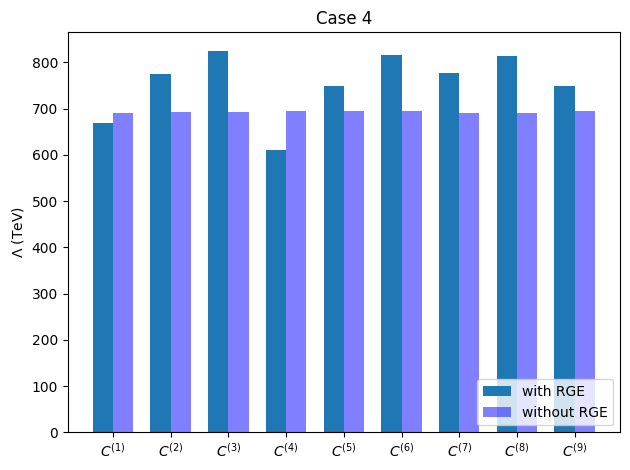

In [25]:
plot_Lambda_bar_graph(Lambda1, title="Case 1", save_path="results/Lambda_case1.pdf")
plot_Lambda_bar_graph(Lambda2, title="Case 2", save_path="results/Lambda_case2.pdf")
plot_Lambda_bar_graph(Lambda3, title="Case 3", save_path="results/Lambda_case3.pdf")
plot_Lambda_bar_graph(Lambda4, title="Case 4", save_path="results/Lambda_case4.pdf")